In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from numpy.linalg import inv

In [3]:
plt.style.use(['ggplot'])
data = pd.read_csv('data.txt')
data.columns = ["id", "long", "lati", "alti"]
data = data.drop('id',axis = 1);

In [4]:
x = data.drop('alti',axis = 1)
x = x[['lati','long']]
y = data['alti']
X = np.array(x)
y = np.array(y)

In [5]:
X = (X-np.mean(X, axis = 0))/np.std(X,axis = 0)
y = (y-np.mean(y))/np.std(y)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures as pf

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.05)
X_test = np.concatenate([X_test,X_val], axis = 0)
y_test = np.concatenate([y_test, y_val])

In [8]:
poly = pf(degree=2, interaction_only=False, include_bias=True)
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)
X_val_2 = poly.fit_transform(X_val)

In [9]:
poly = pf(degree=3, interaction_only=False, include_bias=True)
X_train_3 = poly.fit_transform(X_train)
X_test_3 = poly.fit_transform(X_test)
X_val_3 = poly.fit_transform(X_val)

In [10]:
poly = pf(degree=4, interaction_only=False, include_bias=True)
X_train_4 = poly.fit_transform(X_train)
X_test_4 = poly.fit_transform(X_test)
X_val_4 = poly.fit_transform(X_val)

In [11]:
poly = pf(degree=5, interaction_only=False, include_bias=True)
X_train_5 = poly.fit_transform(X_train)
X_test_5 = poly.fit_transform(X_test)
X_val_5 = poly.fit_transform(X_val)

In [12]:
poly = pf(degree=6, interaction_only=False, include_bias=True)
X_train_6 = poly.fit_transform(X_train)
X_test_6 = poly.fit_transform(X_test)
X_val_6 = poly.fit_transform(X_val)

In [13]:
#Function to calculate loss
def  lossfunc(x_,w_,y_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)

In [14]:
#Function to calculate Rsquared and RMS
def RSq_RMS(w,x,y):
    RSS =  pow(w.dot(x.T) - y,2).sum()
    TSS =  pow(y - y.mean(),2).sum()
    n = len(y)
    rs = 1 - (RSS/TSS)
    RMS = pow(RSS/n,0.5)
    return [rs,RMS]

In [120]:
# Gradient Descent - polynomial of degree 2

alpha =0.005
itns = 1000
counter = 0
losses_2 = []
stop_criterion = True
w = np.array([0,1,1,1,1,1])
print(w)
while(stop_criterion):
    y_hat = w.dot(X_train_2.T)
    loss_ = lossfunc(X_train_2,w,y_train)
    losses_2.append(loss_)
    if counter%20 == 0:
        print("iteration: {} loss : {}" .format(counter,loss_))
    w_der = (y_hat-y_train)*(X_train_2.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    if(counter > 100):
        if (abs((losses_2[counter] - losses_2[counter-1])/losses_2[counter]) < 0.00002):
            stop_criterion = False
    counter = counter+1
    
print(w)

[0 1 1 1 1 1]
iteration: 0 loss : 8.63704844459141
iteration: 20 loss : 4.208056092329959
iteration: 40 loss : 2.387360829006685
iteration: 60 loss : 1.5823928792612274
iteration: 80 loss : 1.189309147739154
iteration: 100 loss : 0.9741864954786608
iteration: 120 loss : 0.8430683722745386
iteration: 140 loss : 0.7560080542713203
iteration: 160 loss : 0.694599896027197
iteration: 180 loss : 0.649489058059575
iteration: 200 loss : 0.6154171006553067
iteration: 220 loss : 0.589159123757582
iteration: 240 loss : 0.5686027781786506
iteration: 260 loss : 0.5522992631126507
iteration: 280 loss : 0.5392227694907463
iteration: 300 loss : 0.528630099955438
iteration: 320 loss : 0.5199730793857119
iteration: 340 loss : 0.5128412495410353
iteration: 360 loss : 0.5069231459546572
iteration: 380 loss : 0.5019795354472948
iteration: 400 loss : 0.4978246041763988
iteration: 420 loss : 0.49431254725363966
iteration: 440 loss : 0.4913278865660305
iteration: 460 loss : 0.4887783946310407
iteration: 480 l

In [121]:
RSq_RMS(w,X_test_2,y_test)

[0.053261679601786072, 0.9757228534118132]

In [122]:
# Gradient Descent for testing

loss_gd_test = lossfunc(X_test_2, w, y_test)
print(loss_gd_test)

0.476017543335


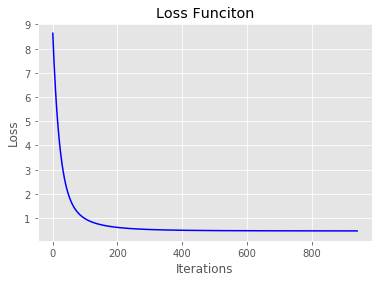

In [123]:
plt.plot(losses_2, 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [124]:
# Gradient Descent - polynomial of degree 3

alpha =0.005
itns = 1000
counter = 0
losses_3 = []
stop_criterion = True
w = np.array([0,1,1,1,1,1,1,1,1,1])
print(w)
while(stop_criterion):
    y_hat = w.dot(X_train_3.T)
    loss_ = lossfunc(X_train_3,w,y_train)
    losses_3.append(loss_)
    if counter%20 == 0:
        print("iteration: {} loss : {}" .format(counter,loss_))
    w_der = (y_hat-y_train)*(X_train_3.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    if(counter > 100):
        if (abs((losses_3[counter] - losses_3[counter-1])/losses_3[counter]) < 0.00002):
            stop_criterion = False
    counter = counter+1
    
print(w)

[0 1 1 1 1 1 1 1 1 1]
iteration: 0 loss : 45.154179295596194
iteration: 20 loss : 4.985522531252451
iteration: 40 loss : 1.6243112173640046
iteration: 60 loss : 0.9648930783657699
iteration: 80 loss : 0.7488724007810661
iteration: 100 loss : 0.6514714203369698
iteration: 120 loss : 0.5972573043965993
iteration: 140 loss : 0.5631001843730311
iteration: 160 loss : 0.539869758849983
iteration: 180 loss : 0.5231706892150775
iteration: 200 loss : 0.5106178991360313
iteration: 220 loss : 0.5008270008746255
iteration: 240 loss : 0.49295741430107953
iteration: 260 loss : 0.4864785184286935
iteration: 280 loss : 0.48104220597514774
iteration: 300 loss : 0.4764110894552908
iteration: 320 loss : 0.47241712486236065
iteration: 340 loss : 0.4689372410050272
iteration: 360 loss : 0.46587862565487487
iteration: 380 loss : 0.4631695798150475
iteration: 400 loss : 0.4607536413138947
iteration: 420 loss : 0.45858567174318077
iteration: 440 loss : 0.45662915530083764
iteration: 460 loss : 0.4548542699961

In [125]:
RSq_RMS(w,X_test_3,y_test)

[0.13601122909368912, 0.93210652500486935]

In [126]:
# Gradient Descent for testing

loss_gd_test = lossfunc(X_test_3, w, y_test)
print(loss_gd_test)

0.434411286978


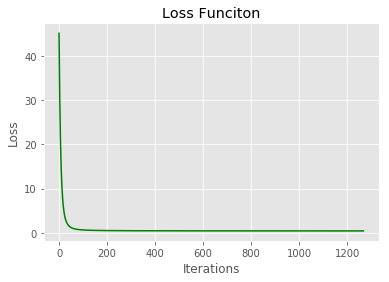

In [151]:
plt.plot(losses_3, 'g')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [51]:
# Gradient Descent - polynomial of degree 4

alpha =0.005
itns = 1000
counter = 0
losses_4 = []
stop_criterion = True
w = np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
print(w)
while(stop_criterion):
    y_hat = w.dot(X_train_4.T)
    loss_ = lossfunc(X_train_4,w,y_train)
    losses_4.append(loss_)
    if counter%20 == 0:
        print("iteration: {} loss : {}" .format(counter,loss_))
    w_der = (y_hat-y_train)*(X_train_4.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    if(counter > 100):
        if (abs((losses_4[counter] - losses_4[counter-1])/losses_4[counter]) < 0.00002):
            stop_criterion = False
    counter = counter+1
    
print(w)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
iteration: 0 loss : 201.41809449504774
iteration: 20 loss : 3.460461838379856
iteration: 40 loss : 1.251310129094166
iteration: 60 loss : 0.8113130484255311
iteration: 80 loss : 0.6851720563303976
iteration: 100 loss : 0.628637466459688
iteration: 120 loss : 0.5937025825581457
iteration: 140 loss : 0.5687078482861578
iteration: 160 loss : 0.5496026603896431
iteration: 180 loss : 0.5344201905289646
iteration: 200 loss : 0.5220119114263525
iteration: 220 loss : 0.5116485512680945
iteration: 240 loss : 0.5028445923469884
iteration: 260 loss : 0.4952643444412047
iteration: 280 loss : 0.48866735885576607
iteration: 300 loss : 0.48287557176730544
iteration: 320 loss : 0.47775308760092705
iteration: 340 loss : 0.4731934745447235
iteration: 360 loss : 0.4691115856957781
iteration: 380 loss : 0.46543814399465333
iteration: 400 loss : 0.462116043105455
iteration: 420 loss : 0.4590977358577572
iteration: 440 loss : 0.4563433294652597
iteration: 460 loss : 0.4538191

In [52]:
RSq_RMS(w,X_test_4,y_test)

[0.18676823314659285, 0.90020494065695589]

In [53]:
# Gradient Descent for testing

loss_gd_test = lossfunc(X_test_4, w, y_test)
print(loss_gd_test)

0.405184467592


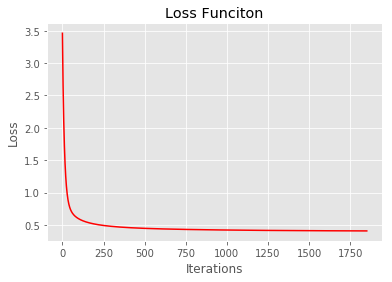

In [56]:
plt.plot(losses_4[20:], 'r')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [142]:
# Gradient Descent - polynomial of degree 5

alpha =0.005
itns = 1000
counter = 0
losses_5 = []
stop_criterion = True
w = np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
print(w)
while(stop_criterion):
    y_hat = w.dot(X_train_5.T)
    loss_ = lossfunc(X_train_5,w,y_train)
    losses_5.append(loss_)
    if counter%20 == 0:
        print("iteration: {} loss : {}" .format(counter,loss_))
    w_der = (y_hat-y_train)*(X_train_5.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    if(counter > 100):
        if (abs((losses_5[counter] - losses_5[counter-1])/losses_5[counter]) < 0.00002):
            stop_criterion = False
    counter = counter+1
    
print(w)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
iteration: 0 loss : 934.3557487424149
iteration: 20 loss : 3.8303640831444468
iteration: 40 loss : 2.65760167942102
iteration: 60 loss : 2.026595242812893
iteration: 80 loss : 1.5992509341530368
iteration: 100 loss : 1.29265057865178
iteration: 120 loss : 1.0691340456659622
iteration: 140 loss : 0.9053039438169879
iteration: 160 loss : 0.7848569206728668
iteration: 180 loss : 0.6960589325031242
iteration: 200 loss : 0.6303898607004342
iteration: 220 loss : 0.581645881047922
iteration: 240 loss : 0.5453037880199528
iteration: 260 loss : 0.5180625093331962
iteration: 280 loss : 0.4975107011617057
iteration: 300 loss : 0.48188530326247253
iteration: 320 loss : 0.4698959836519227
iteration: 340 loss : 0.46059738880783263
iteration: 360 loss : 0.45329611236075784
iteration: 380 loss : 0.4474828979787058
iteration: 400 loss : 0.44278319659818494
iteration: 420 loss : 0.4389210833955218
iteration: 440 loss : 0.4356929058137342
iteration: 460 loss : 

In [143]:
RSq_RMS(w,X_test_5,y_test)

[0.25365117467964271, 0.86632814916169465]

In [144]:
# Gradient Descent for testing

loss_gd_test = lossfunc(X_test_5, w, y_test)
print(loss_gd_test)

0.375262231015


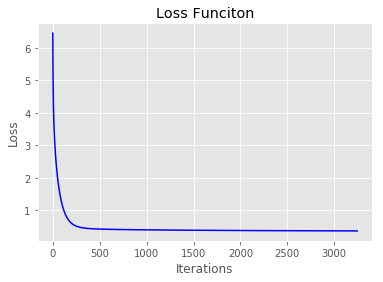

In [145]:
plt.plot(losses_5[10:], 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [43]:
# Gradient Descent - polynomial of degree 6

alpha =0.001
itns = 2000
counter = 0
losses_6 = []
stop_criterion = True
w_6 = np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
print(w_6)
#while(stop_criterion):
for i in range(itns):
    y_hat = w_6.dot(X_train_6.T)
    loss_ = lossfunc(X_train_6,w_6,y_train)
    losses_6.append(loss_)
    if counter%20 == 0:
        print("iteration: {} loss : {}" .format(counter,loss_))
    w_der = (y_hat-y_train)*(X_train_6.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w_6 = w_6 - alpha*w_der_norm
    if(counter > 100):
        if (abs((losses_6[counter] - losses_6[counter-1])/losses_6[counter]) < 0.000008):
            stop_criterion = False
    counter = counter+1
    
print(w_6)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
iteration: 0 loss : 4385.383502430813
iteration: 20 loss : 23.540161437052888
iteration: 40 loss : 16.157947256574182
iteration: 60 loss : 12.67834396764375
iteration: 80 loss : 10.470084804365245
iteration: 100 loss : 8.86775306259559
iteration: 120 loss : 7.608908536348567
iteration: 140 loss : 6.576837292160033
iteration: 160 loss : 5.712483513373012
iteration: 180 loss : 4.981058114598297
iteration: 200 loss : 4.35893806437259
iteration: 220 loss : 3.828351756587763
iteration: 240 loss : 3.375095460464404
iteration: 260 loss : 2.9874520411267818
iteration: 280 loss : 2.655603772885946
iteration: 300 loss : 2.3712620323633233
iteration: 320 loss : 2.127402994355704
iteration: 340 loss : 1.9180630700583534
iteration: 360 loss : 1.738173262206826
iteration: 380 loss : 1.5834218926801105
iteration: 400 loss : 1.4501395294595576
iteration: 420 loss : 1.3352019676315547
iteration: 440 loss : 1.2359481864209494
iteration: 460 loss 

In [44]:
RSq_RMS(w_6,X_test_6,y_test)

[0.099724464532058188, 0.94715694705120557]

In [45]:
RSq_RMS(w_6,X_train_6,y_train)

[0.097748425280967943, 0.95058529040174122]

In [46]:
# Gradient Descent for testing

loss_gd6_test = lossfunc(X_test_6, w_6, y_test)
print(loss_gd6_test)

0.448553141174


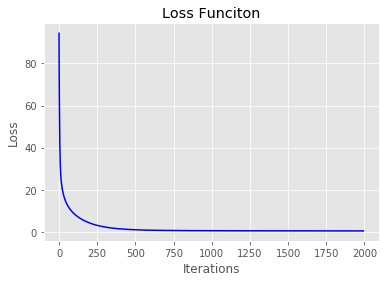

In [49]:
plt.plot(losses_6[5:], 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

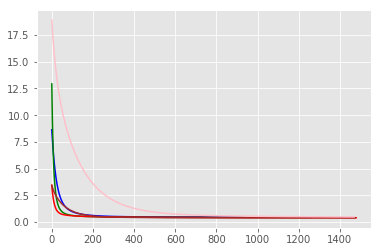

In [160]:
plt.plot(losses_2, 'b')
plt.plot(losses_3[10:], 'g')
plt.plot(losses_4[20:1500], 'r')
plt.plot(losses_5[25:1500], 'brown')
plt.plot(losses_6[30:1500], 'pink')

In [16]:
def  lossL1(x_,w_,y_,lambda_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)+(lambda_)*np.sum(np.abs(w_[1:]))

In [37]:
# Gradient Descent with L1 reg

alpha =0.0005
itns = 2000
lambdas = [0.1,0.5,0.6,0.7,0.75]
losses_l1 = {}
losses_l1_val = {}
counter_l1 = []
w_storel1 = {}
for lambda_ in lambdas:
    losses_l1[lambda_] = []
    w = np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
    for i in range(itns):
        y_hat = w.dot(X_train_6.T)  
        if i%20 == 0:  
            loss_ = lossL1(X_train_6,w,y_train,lambda_)
            losses_l1[lambda_].append(loss_)
            print("lambda: {} iteration: {} loss : {}" .format(lambda_,i,loss_))   
            counter_l1.append(i)
        w_der = (y_hat-y_train)*(X_train_6.T)
        w_der_norm = np.mean(w_der, axis = 1) + lambda_*np.sign(w)
        w = w - alpha*w_der_norm
    w_storel1[lambda_] = w
    losses_l1_val[lambda_] = lossL1(X_val_6, w, y_val,lambda_)

lambda: 0.1 iteration: 0 loss : 4388.083502430813
lambda: 0.1 iteration: 20 loss : 45.29943688695835
lambda: 0.1 iteration: 40 loss : 25.166528992065373
lambda: 0.1 iteration: 60 loss : 20.28227803783723
lambda: 0.1 iteration: 80 loss : 17.412906401775988
lambda: 0.1 iteration: 100 loss : 15.34901616153323
lambda: 0.1 iteration: 120 loss : 13.759854714427844
lambda: 0.1 iteration: 140 loss : 12.4796195354303
lambda: 0.1 iteration: 160 loss : 11.411285901842039
lambda: 0.1 iteration: 180 loss : 10.49482626632237
lambda: 0.1 iteration: 200 loss : 9.691862879588058
lambda: 0.1 iteration: 220 loss : 8.977192460669151
lambda: 0.1 iteration: 240 loss : 8.333803710852857
lambda: 0.1 iteration: 260 loss : 7.749854365421868
lambda: 0.1 iteration: 280 loss : 7.216807202930094
lambda: 0.1 iteration: 300 loss : 6.728270135399497
lambda: 0.1 iteration: 320 loss : 6.279523567842983
lambda: 0.1 iteration: 340 loss : 5.868373148374601
lambda: 0.1 iteration: 360 loss : 5.4891404360745355
lambda: 0.1 it

lambda: 0.5 iteration: 1120 loss : 1.1264323089418635
lambda: 0.5 iteration: 1140 loss : 1.092882182216227
lambda: 0.5 iteration: 1160 loss : 1.0598035456341977
lambda: 0.5 iteration: 1180 loss : 1.0276321644742545
lambda: 0.5 iteration: 1200 loss : 0.9962281131169113
lambda: 0.5 iteration: 1220 loss : 0.9656544926980266
lambda: 0.5 iteration: 1240 loss : 0.935644653273188
lambda: 0.5 iteration: 1260 loss : 0.9062989502440566
lambda: 0.5 iteration: 1280 loss : 0.8810586246662224
lambda: 0.5 iteration: 1300 loss : 0.857470999840493
lambda: 0.5 iteration: 1320 loss : 0.8346269787093389
lambda: 0.5 iteration: 1340 loss : 0.8149146166651211
lambda: 0.5 iteration: 1360 loss : 0.7953722864622448
lambda: 0.5 iteration: 1380 loss : 0.7765005314262736
lambda: 0.5 iteration: 1400 loss : 0.7578812589534136
lambda: 0.5 iteration: 1420 loss : 0.7389506617996937
lambda: 0.5 iteration: 1440 loss : 0.7211949627759955
lambda: 0.5 iteration: 1460 loss : 0.7031144878558075
lambda: 0.5 iteration: 1480 los

lambda: 0.7 iteration: 200 loss : 13.782711965660774
lambda: 0.7 iteration: 220 loss : 12.716368459022746
lambda: 0.7 iteration: 240 loss : 11.76011621936687
lambda: 0.7 iteration: 260 loss : 10.882422553967903
lambda: 0.7 iteration: 280 loss : 10.073537367698378
lambda: 0.7 iteration: 300 loss : 9.336751000121957
lambda: 0.7 iteration: 320 loss : 8.663660058637785
lambda: 0.7 iteration: 340 loss : 8.038472289301861
lambda: 0.7 iteration: 360 loss : 7.456862943252774
lambda: 0.7 iteration: 380 loss : 6.915654768264799
lambda: 0.7 iteration: 400 loss : 6.415187214659852
lambda: 0.7 iteration: 420 loss : 5.9565956132760185
lambda: 0.7 iteration: 440 loss : 5.53173756713537
lambda: 0.7 iteration: 460 loss : 5.148204307816037
lambda: 0.7 iteration: 480 loss : 4.793533950999456
lambda: 0.7 iteration: 500 loss : 4.464330700159327
lambda: 0.7 iteration: 520 loss : 4.157243743262576
lambda: 0.7 iteration: 540 loss : 3.872466738321865
lambda: 0.7 iteration: 560 loss : 3.610964006683468
lambda: 

lambda: 0.75 iteration: 1280 loss : 0.5733761687190195
lambda: 0.75 iteration: 1300 loss : 0.558730953300873
lambda: 0.75 iteration: 1320 loss : 0.5490773852199581
lambda: 0.75 iteration: 1340 loss : 0.5433620300669539
lambda: 0.75 iteration: 1360 loss : 0.5373106993949419
lambda: 0.75 iteration: 1380 loss : 0.5319446673768078
lambda: 0.75 iteration: 1400 loss : 0.5266181476252706
lambda: 0.75 iteration: 1420 loss : 0.5215879314931217
lambda: 0.75 iteration: 1440 loss : 0.5152778694674225
lambda: 0.75 iteration: 1460 loss : 0.51024354570516
lambda: 0.75 iteration: 1480 loss : 0.5050191397035637
lambda: 0.75 iteration: 1500 loss : 0.5001973175956209
lambda: 0.75 iteration: 1520 loss : 0.4954516627834332
lambda: 0.75 iteration: 1540 loss : 0.4927845005623093
lambda: 0.75 iteration: 1560 loss : 0.4929144055065345
lambda: 0.75 iteration: 1580 loss : 0.49220513814493594
lambda: 0.75 iteration: 1600 loss : 0.49296469325615944
lambda: 0.75 iteration: 1620 loss : 0.4923168226129223
lambda: 0.7

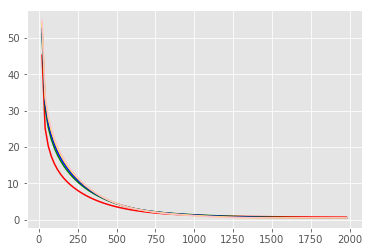

In [39]:
colors = np.array(['red','green','blue','yellow','pink'])
for i,lamb in enumerate(losses_l1.keys()):
    plt.plot(counter_l1[1:100],losses_l1[lamb][1:],color = colors[i])

0.687751831526
0.489447630646
0.479740015437
0.480531139516
0.483092664551


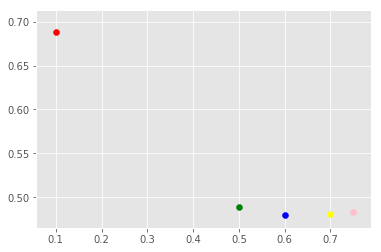

In [40]:
for i,lamb in enumerate(losses_l1_val.keys()):
    plt.scatter(lamb,losses_l1_val[lamb],color=colors[i])
    print(losses_l1_val[lamb])

In [41]:
RSq_RMS(w_storel1[0.6],X_train_6,y_train)

[0.049291662954186632, 0.97577776234928493]

In [42]:
RSq_RMS(w_storel1[0.6],X_test_6,y_test)

[0.04940718797657262, 0.9732658558991214]

In [28]:
# Gradient Descent with L1 reg for testing
loss_l1gd_test = lossL1(X_test_6, w_storel1[0.6], y_test, 0.6)
#print(w_storel1[0.6])
print(loss_l1gd_test)

0.487184555477


In [195]:
def  lossL2(x_,w_,y_,lambda_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)+0.5*lambda_*np.sum(w_**2)

In [198]:
# Gradient Descent with L2 reg

alpha =0.001
itns = 1000
lambdas = [0.5,1,2,4,5]
losses_l2 = {}
losses_l2_val = {}
counter_l2 = []
w_store = {}

for lambda_ in lambdas:
    losses_l2[lambda_] = []
    w = np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
    for i in range(itns):
        y_hat = w.dot(X_train_6.T)  
        if i%20 == 0:  
            loss_ = lossL2(X_train_6,w,y_train,lambda_)
            losses_l2[lambda_].append(loss_)
            counter_l2.append(i)
            print("lambda: {} iteration: {} loss : {}" .format(lambda_,i,loss_))
            
        w_der = (y_hat-y_train)*(X_train_6.T)
        w_der_norm = np.mean(w_der, axis = 1) + lambda_*w
        w = w - alpha*w_der_norm
    w_store[lambda_] = w
    losses_l2_val[lambda_] = lossL2(X_val_6, w, y_val,lambda_)

lambda: 0.5 iteration: 0 loss : 4383.987650531316
lambda: 0.5 iteration: 20 loss : 25.522481100754284
lambda: 0.5 iteration: 40 loss : 17.57915670235288
lambda: 0.5 iteration: 60 loss : 13.706470456106453
lambda: 0.5 iteration: 80 loss : 11.20439556288671
lambda: 0.5 iteration: 100 loss : 9.375761901613808
lambda: 0.5 iteration: 120 loss : 7.943251106993769
lambda: 0.5 iteration: 140 loss : 6.779980618914909
lambda: 0.5 iteration: 160 loss : 5.818503771436352
lambda: 0.5 iteration: 180 loss : 5.016897055929007
lambda: 0.5 iteration: 200 loss : 4.34557499887904
lambda: 0.5 iteration: 220 loss : 3.7818916145083694
lambda: 0.5 iteration: 240 loss : 3.307728532519114
lambda: 0.5 iteration: 260 loss : 2.908266607631933
lambda: 0.5 iteration: 280 loss : 2.571255864113665
lambda: 0.5 iteration: 300 loss : 2.2865180225401196
lambda: 0.5 iteration: 320 loss : 2.0455742354645827
lambda: 0.5 iteration: 340 loss : 1.841351263309712
lambda: 0.5 iteration: 360 loss : 1.6679431459590823
lambda: 0.5 i

lambda: 4 iteration: 220 loss : 2.0892948847321415
lambda: 4 iteration: 240 loss : 1.7053276192519538
lambda: 4 iteration: 260 loss : 1.416127725899058
lambda: 4 iteration: 280 loss : 1.1974610959155005
lambda: 4 iteration: 300 loss : 1.031455458097063
lambda: 4 iteration: 320 loss : 0.9048963091002458
lambda: 4 iteration: 340 loss : 0.8079877602451742
lambda: 4 iteration: 360 loss : 0.7334484817941624
lambda: 4 iteration: 380 loss : 0.6758506396823359
lambda: 4 iteration: 400 loss : 0.6311356198677653
lambda: 4 iteration: 420 loss : 0.5962586451694414
lambda: 4 iteration: 440 loss : 0.5689275173716088
lambda: 4 iteration: 460 loss : 0.5474101952546541
lambda: 4 iteration: 480 loss : 0.5303927863139422
lambda: 4 iteration: 500 loss : 0.5168745156108796
lambda: 4 iteration: 520 loss : 0.5060898599312253
lambda: 4 iteration: 540 loss : 0.49745067362002493
lambda: 4 iteration: 560 loss : 0.4905030545649197
lambda: 4 iteration: 580 loss : 0.4848951005856263
lambda: 4 iteration: 600 loss : 

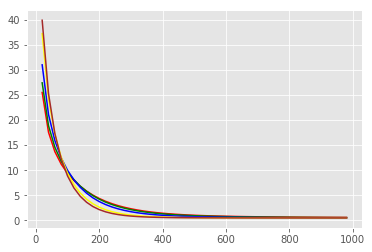

In [200]:
colors = np.array(['red','green','blue','yellow','brown','pink'])
for i,lamb in enumerate(losses_l2.keys()):
    plt.plot(counter_l2[1:50], losses_l2[lamb][1:],color = colors[i])

0.552764300405
0.513500390207
0.467613109979
0.456295538978
0.457103242733


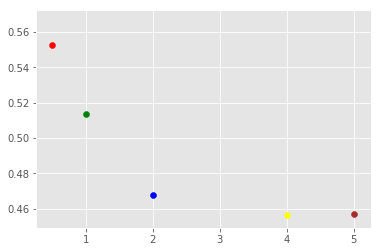

In [201]:
for i,lamb in enumerate(losses_l2_val.keys()):
    plt.scatter(lamb,losses_l2_val[lamb],color=colors[i])
    print(losses_l2_val[lamb])

In [203]:
print(RSq_RMS(w_store[4],X_test_6,y_test))

[0.091102721781383567, 0.95602423255776714]


In [205]:
# Gradient Descent with L2 reg for testing
loss_l2gd_test = lossL2(X_test_6, w_store[4], y_test, 4)
#print(w_store[4])
print(loss_l2gd_test)

0.46406128067
